In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.font_manager as fm
import geopandas as gpd
import folium
from folium.plugins import HeatMap
 
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# font_path = "C:\\Users\\Playdata\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Pretendard-Regular.otf"
# font_name = fm.FontProperties(fname=font_path).get_name()
# plt.rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

### 0. 데이터 불러오기

In [87]:
df = pd.read_csv('./data/Life-Expectancy-Data-Averaged.csv')
df.head()

Country                         Region    Year  Infant_deaths  \
0          Afghanistan                           Asia  2007.5       71.08125   
1              Albania                 Rest of Europe  2007.5       15.25625   
2              Algeria                         Africa  2007.5       26.75625   
3               Angola                         Africa  2007.5       88.76875   
4  Antigua and Barbuda  Central America and Caribbean  2007.5        9.47500   

   Under_five_deaths  Adult_mortality  Alcohol_consumption  Hepatitis_B  \
0           98.61250       265.804969             0.016125      64.5625   
1           17.14375        83.132969             4.696875      98.0000   
2           31.19375       113.439281             0.400625      88.3125   
3          144.16250       297.844063             4.935625      68.8125   
4           11.51875       142.478813             7.755000      98.2500   

   Measles       BMI    Polio  Diphtheria  Incidents_HIV  GDP_per_capita  \
0  24.3750  22.46250  55.3750     55.1250       0.022500        408.5625   
1  95.9375  25.85625  98.1250     98.0625       0.025625       3071.1250   
2  93.2500  24.86875  91.7500     91.8750       0.021875       3745.1250   
3  64.0000  22.51875  35.7500     55.5625       1.303750       2647.8125   
4  75.4375  25.85000  96.9375     98.3125       0.125000      14678.7500   

   Population_mln  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
0       27.450625                     16.58125                  15.58125   
1        2.969375                      1.61875                   1.70000   
2       34.820625                      6.09375                   5.97500   
3       21.623750                      6.19375                   6.66875   
4        0.085000                      3.42500                   3.37500   

   Schooling  Economy_status  Life_expectancy  
0    2.90000             1.0         59.65625  
1    9.24375             1.0         75.95000  
2    6.99375             1.0         73.78750  
3    4.60625             1.0         52.82500  
4    9.01875             1.0         75.35000

**분석할 컬럼**

* 경제적 사회적 요인 관련 변수

    - `Country`: 국가명
    - `Region`: 지역명
    - `GDP_per_capita`: 1인당 GDP
    - `Population_mln`: 인구(백만 명 단위)

### 1. 국가별/지역별 기대수명

In [88]:
df = df.sort_values('Life_expectancy')

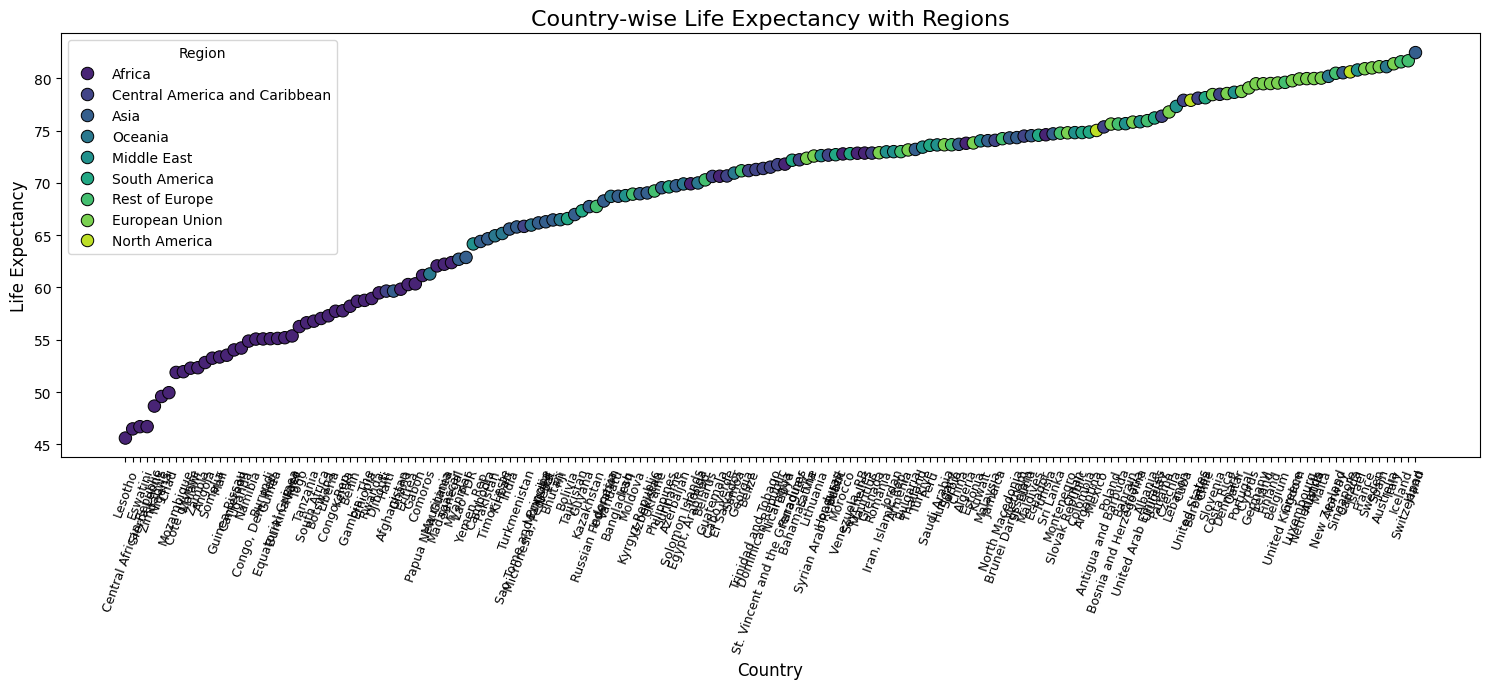

In [89]:
plt.figure(figsize=(15, 7))
sns.scatterplot(
    data=df,
    x='Country',
    y='Life_expectancy',
    hue='Region',
    palette='viridis',
    s=80, 
    edgecolor='black'
)

plt.xticks(rotation=70, fontsize=9)
plt.title('Country-wise Life Expectancy with Regions', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)
plt.legend(title='Region', loc='upper left')
plt.tight_layout()

plt.tight_layout()
plt.show()

In [90]:
world = gpd.read_file("./data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

In [91]:
name_changes = {
    'United Republic of Tanzania': 'Tanzania',
    'Western Sahara': 'Sahrawi Arab Democratic Republic',
    'United States of America': 'United States',
    'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
    'Sudan': 'Sudan',
    'Russia': 'Russian Federation',
    'The Bahamas': 'Bahamas, The',
    'Falkland Islands': 'Falkland Islands (Malvinas)',
    'Greenland': 'Greenland',
    'French Southern and Antarctic Lands': 'French Southern and Antarctic Lands',
    'East Timor': 'Timor-Leste',
    'Venezuela': 'Venezuela, RB',
    'Puerto Rico': 'Puerto Rico',
    'Ivory Coast': "Cote d'Ivoire",
    'Republic of the Congo': 'Congo, Rep.',
    'eSwatini': 'Eswatini',
    'Palestine': 'Palestine',
    'Gambia': 'Gambia, The',
    'Laos': 'Lao PDR',
    'North Korea': 'Korea, Dem. People\'s Rep.',
    'South Korea': 'Korea, Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Iran': 'Iran, Islamic Rep.',
    'Syria': 'Syrian Arab Republic',
    'Turkey': 'Turkiye',
    'New Caledonia': 'New Caledonia',
    'Taiwan': 'Taiwan (Province of China)',
    'Brunei': 'Brunei Darussalam',
    'Slovakia': 'Slovak Republic',
    'Yemen': 'Yemen, Rep.',
    'Antarctica': 'Antarctica',
    'Northern Cyprus': 'Northern Cyprus',
    'Egypt': 'Egypt, Arab Rep.',
    'Somaliland': 'Somaliland',
    'Republic of Serbia': 'Serbia',
    'Kosovo': 'Kosovo',
    'South Sudan': 'South Sudan'
}

# ADMIN 열의 값을 변경
world['ADMIN'] = world['ADMIN'].replace(name_changes)

In [92]:
merged = world.merge(df, left_on="ADMIN", right_on="Country", how="left")

m = folium.Map(location=[30, 0], zoom_start=0.5, tiles="CartoDB positron")

# 기대수명을 Choropleth로 추가
folium.Choropleth(
    geo_data=merged.__geo_interface__,  # GeoJSON 포맷 사용
    data=merged,                      # 데이터프레임
    columns=['ADMIN', 'Life_expectancy'],  # 국가와 기대수명 컬럼
    key_on='feature.properties.ADMIN',  # 'ADMIN' 속성으로 연결
    fill_color='viridis',  # 색상 그라데이션
    fill_opacity=0.8,
    line_opacity=0.4,
    legend_name='Life Expectancy (Years)'
).add_to(m)

m

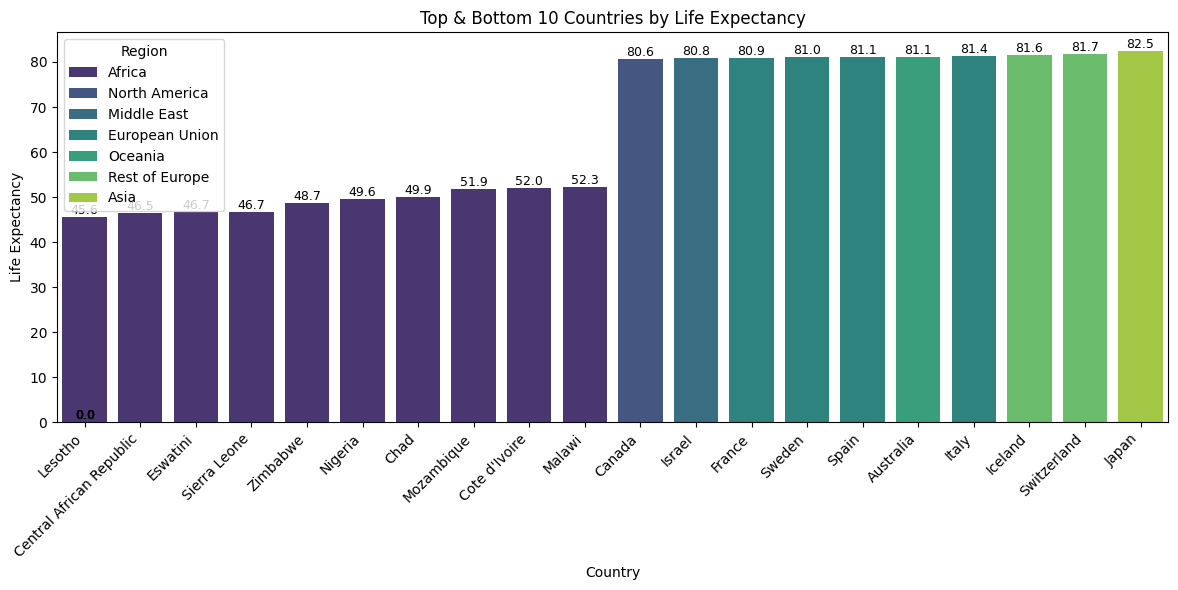

In [93]:

df_top_bottom = pd.concat([df.head(10), df.tail(10)])


plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_top_bottom,
    x='Country',
    y='Life_expectancy',
    hue='Region',
    palette='viridis'
)

for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(), 
        f'{bar.get_height():.1f}',  
        ha='center',  
        va='bottom',  
        fontsize=9,  
        color='black'  
    )


plt.xticks(rotation=45, ha='right')
plt.title('Top & Bottom 10 Countries by Life Expectancy')
plt.ylabel('Life Expectancy')
plt.xlabel('Country')

plt.tight_layout()
plt.show()

C:\Users\ljh10\AppData\Local\Temp\ipykernel_131208\2657242675.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_mean.values, y=region_mean.index, palette="viridis")


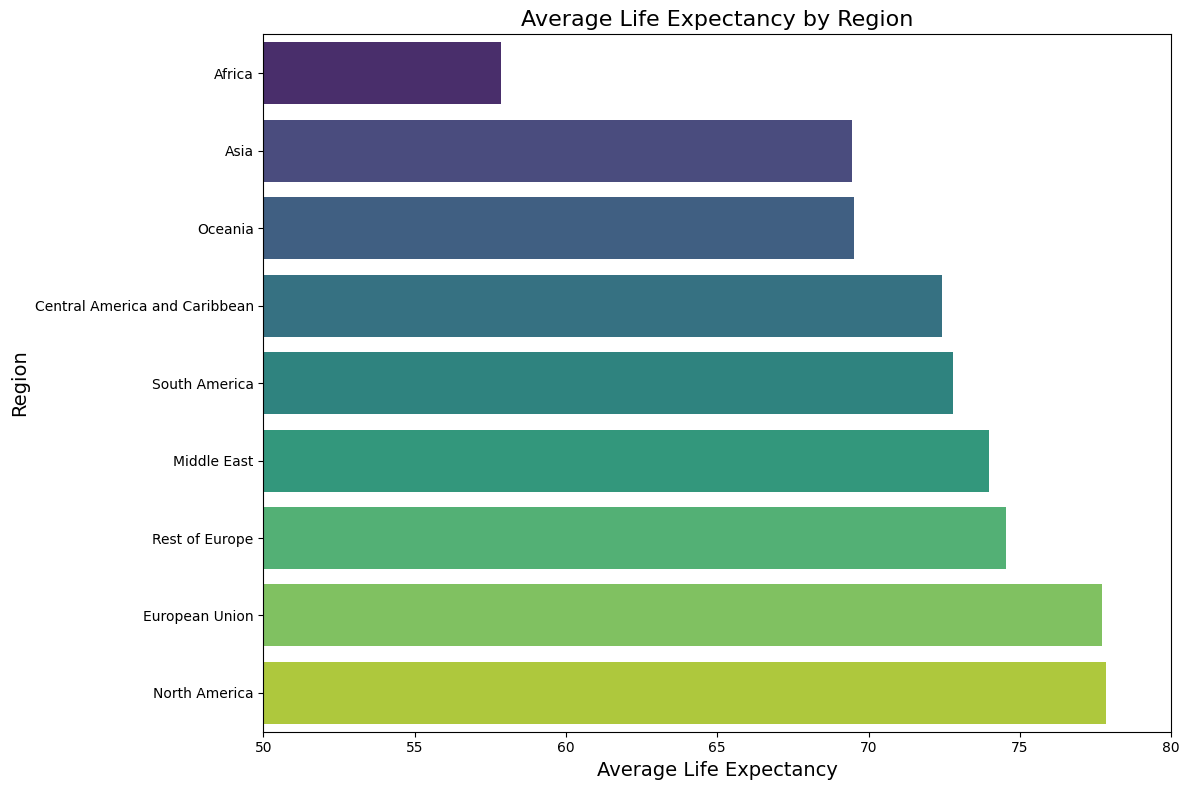

In [94]:
region_mean = df.groupby('Region')['Life_expectancy'].mean()
region_mean = region_mean.sort_values(ascending=True)

plt.figure(figsize=(12, 8))
sns.barplot(x=region_mean.values, y=region_mean.index, palette="viridis")

# 그래프 제목과 레이블
plt.title('Average Life Expectancy by Region', fontsize=16)
plt.xlabel('Average Life Expectancy', fontsize=14)
plt.ylabel('Region', fontsize=14)

plt.xlim(50, 80)
# 그래프 표시
plt.tight_layout()
plt.show()

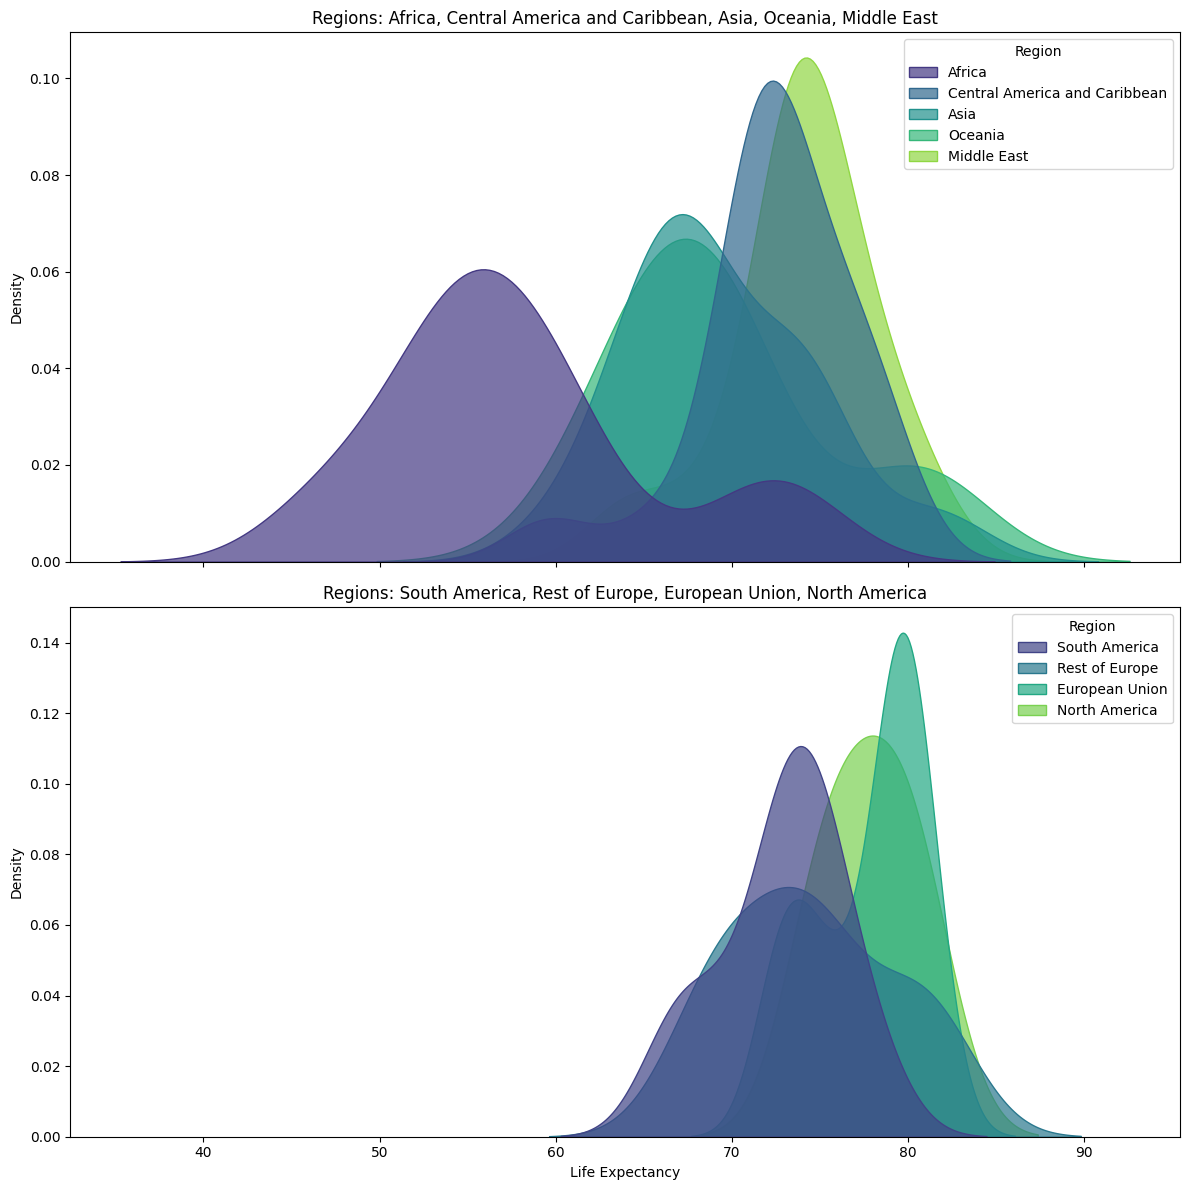

In [95]:
regions = df["Region"].unique()
n_regions = len(regions)


regions_per_subplot = 5
n_rows = int(np.ceil(n_regions / regions_per_subplot))


fig, axes = plt.subplots(n_rows, 1, figsize=(12, 6 * n_rows), sharex=True)


for i, ax in enumerate(axes):
    start_idx = i * regions_per_subplot
    end_idx = start_idx + regions_per_subplot
    selected_regions = regions[start_idx:end_idx]


    subset = df[df["Region"].isin(selected_regions)]
    
    sns.kdeplot(
        data=subset,
        x="Life_expectancy",
        hue="Region",
        fill=True,
        palette="viridis",
        alpha=0.7,
        common_norm=False,
        ax=ax,
    )
    
    ax.set_title(f"Regions: {', '.join(selected_regions)}", fontsize=12)
    ax.set_xlabel("Life Expectancy", fontsize=10)
    ax.set_ylabel("Density", fontsize=10)

plt.tight_layout()
plt.show()

* 대륙별 기대수명의 분포를 커널 밀도 추정을 통해 시각화 한 결과 


Africa:

분포가 왼쪽으로 치우쳐 있으며, 가장 낮은 기대수명을 보인다.
주요 봉우리는 약 50~55세에 위치하며, 이는 전반적으로 낮은 평균 기대수명을 암시한다.
분포가 넓게 퍼져 있어 국가 간 기대수명의 격차가 큼을 알 수 있다.

Central America and Caribbean:

봉우리는 약 70세 근처에 위치하며, 기대수명이 중간 정도 수준이다.
분포가 상대적으로 좁아, 해당 지역의 국가들이 기대수명에서 비슷한 경향을 보임을 나타낸다.

Asia:

봉우리가 약 70~75세 근처에 있으며, 분포가 오른쪽으로 길게 늘어져 있어 기대수명이 더 높은 국가도 포함되어 있음을 보여준다.
아시아 지역은 경제적/사회적 격차로 인해 넓은 범위를 가질 가능성이 크다.

Oceania:

기대수명이 80세 근처에 집중되어 있으며, 높은 수준을 유지하고 있다.
분포가 매우 좁아, 이 지역의 국가들이 유사한 기대수명을 가진다는 것을 암시한다.

Middle East:

봉우리가 약 70세 근처에 위치하며, 비교적 중앙에 분포한다.
다른 지역에 비해 분포의 폭이 좁고 균일해 보인다.


South America:

봉우리는 약 70~75세 근처에 있으며, 중상위 기대수명을 보인다.
분포는 비교적 좁아, 국가 간 기대수명의 차이가 크지 않음을 나타낸다.

Rest of Europe:

봉우리는 75~80세 사이에 있으며, 전반적으로 높은 기대수명을 나타낸다.
분포가 매우 좁고 밀도가 높아, 유럽 대부분의 국가가 높은 기대수명을 공유하고 있음을 알 수 있다.

North America:

봉우리가 80세 근처에 있으며, 가장 높은 기대수명을 보이는 그룹 중 하나입니다.
분포가 좁아 국가 간 격차가 적다.

3. 전반적인 특징 및 비교

**아프리카(Africa)** 지역은 가장 낮은 기대수명을 보이며, 국가 간 편차가 큰 편이다.

**오세아니아(Oceania)**, **유럽(Rest of Europe)**, 북아메리카(North America)는 높은 기대수명을 공유하며, 분포가 좁고 국가 간 편차가 작다.

**중남미 및 아시아 지역**은 중간 수준의 기대수명을 보이지만, 일부 국가는 더 높은 기대수명을 가지며 분포가 넓게 퍼져 있다.

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 92 to 82
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      179 non-null    object 
 1   Region                       179 non-null    object 
 2   Year                         179 non-null    float64
 3   Infant_deaths                179 non-null    float64
 4   Under_five_deaths            179 non-null    float64
 5   Adult_mortality              179 non-null    float64
 6   Alcohol_consumption          179 non-null    float64
 7   Hepatitis_B                  179 non-null    float64
 8   Measles                      179 non-null    float64
 9   BMI                          179 non-null    float64
 10  Polio                        179 non-null    float64
 11  Diphtheria                   179 non-null    float64
 12  Incidents_HIV                179 non-null    float64
 13  GDP_per_capita           

### 2. GDP와 인구수 이상치 분석

* GDP_per_capita와 Population_mln이 지역별로 상이할 수 있기 때문에, 지역별로 이상치를 판단해보려 한다.

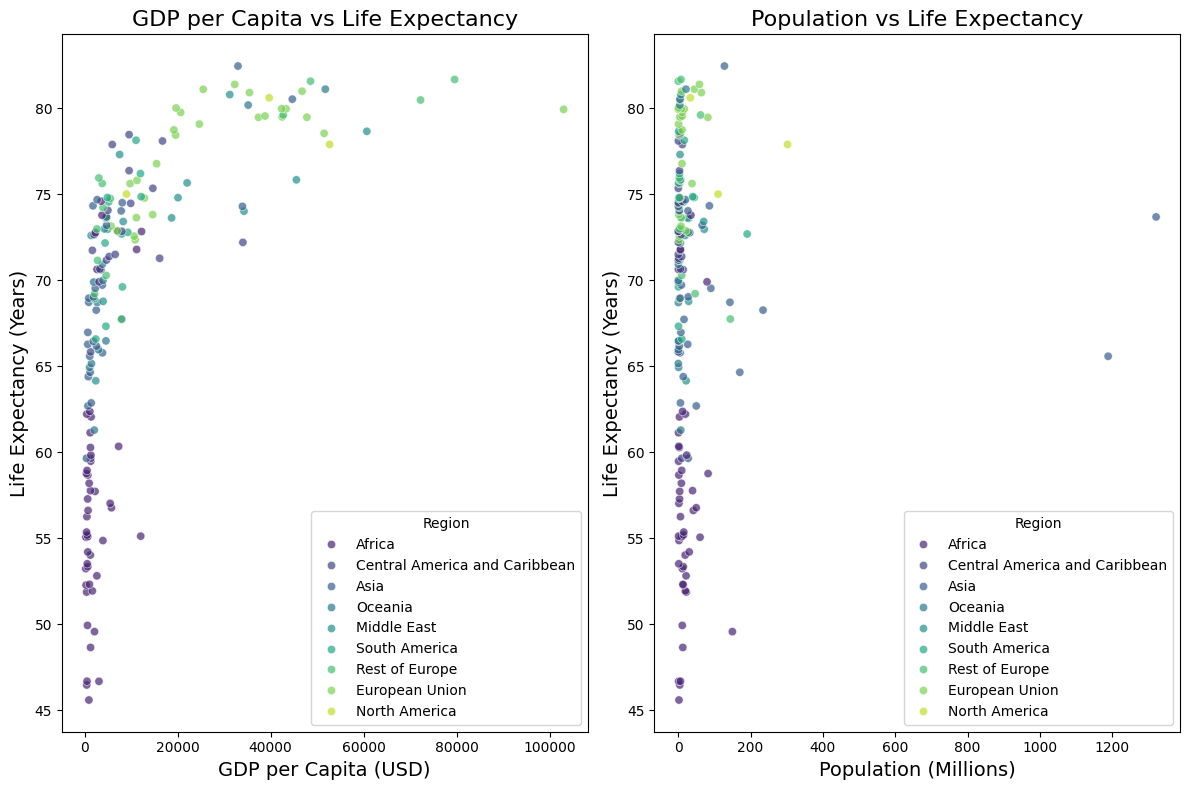

In [97]:
# GDP per Capita와 Life Expectancy 산점도
plt.figure(figsize=(12, 8))

# GDP와 Life Expectancy 산점도
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='GDP_per_capita', y='Life_expectancy', hue='Region', palette='viridis', alpha=0.7)
plt.title('GDP per Capita vs Life Expectancy', fontsize=16)
plt.xlabel('GDP per Capita (USD)', fontsize=14)
plt.ylabel('Life Expectancy (Years)', fontsize=14)

# Population과 Life Expectancy 산점도
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Population_mln', y='Life_expectancy', hue='Region', palette='viridis', alpha=0.7)
plt.title('Population vs Life Expectancy', fontsize=16)
plt.xlabel('Population (Millions)', fontsize=14)
plt.ylabel('Life Expectancy (Years)', fontsize=14)

plt.tight_layout()
plt.show()

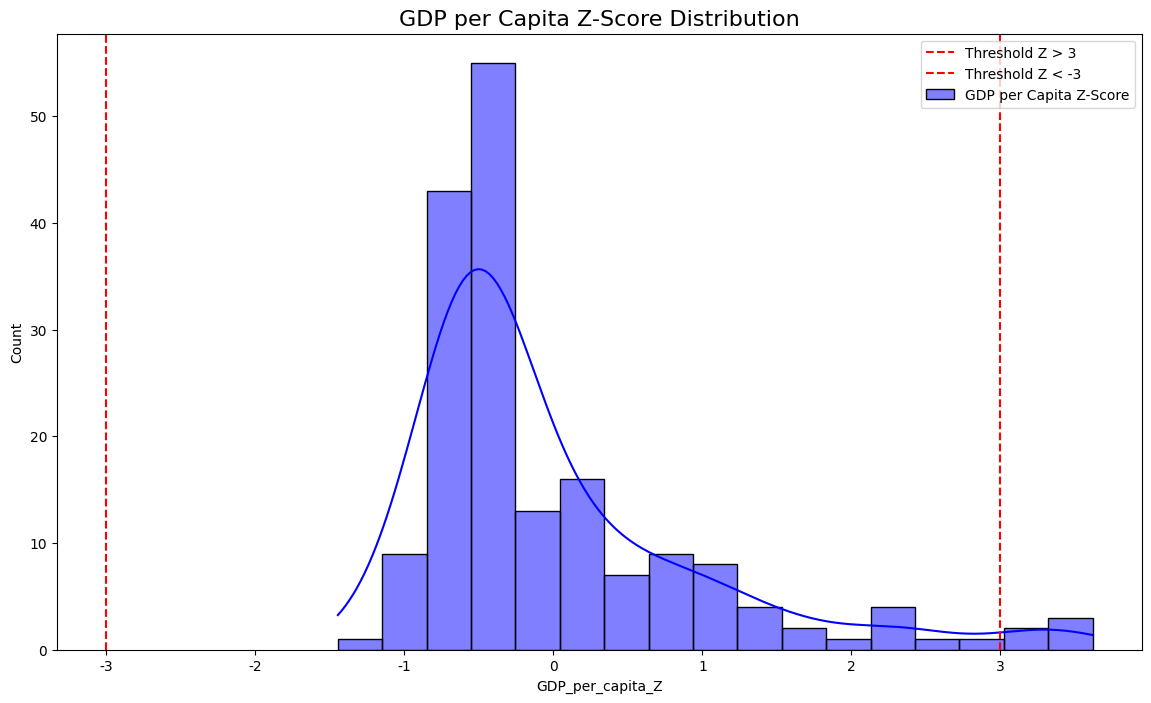

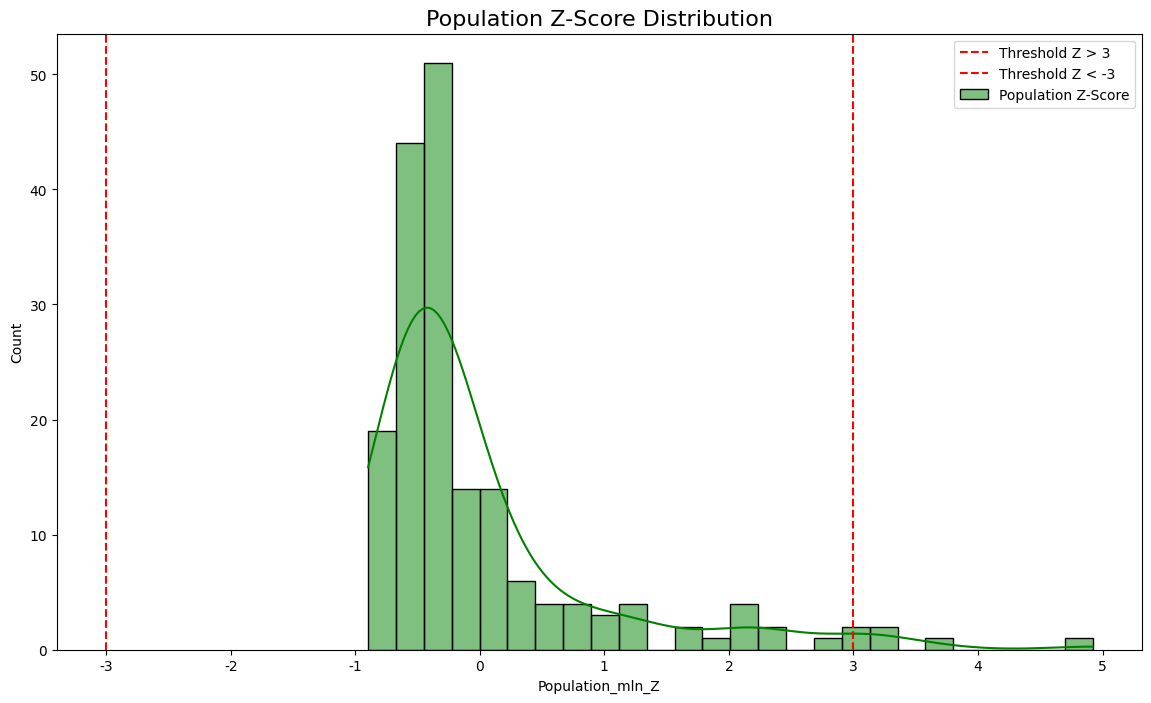

In [98]:

# 지역별 Z-score 계산
region_stats = df.groupby('Region')[['GDP_per_capita', 'Population_mln']].agg(['mean', 'std'])
df['GDP_per_capita_Z'] = df.apply(lambda row: (row['GDP_per_capita'] - region_stats.loc[row['Region'], ('GDP_per_capita', 'mean')]) / region_stats.loc[row['Region'], ('GDP_per_capita', 'std')], axis=1)
df['Population_mln_Z'] = df.apply(lambda row: (row['Population_mln'] - region_stats.loc[row['Region'], ('Population_mln', 'mean')]) / region_stats.loc[row['Region'], ('Population_mln', 'std')], axis=1)

# Z-score가 3보다 큰 값은 이상치로 간주
outliers_GDP_region = df[df['GDP_per_capita_Z'].abs() > 3]
outliers_population_region = df[df['Population_mln_Z'].abs() > 3]

# GDP per Capita Z-Score 히스토그램
plt.figure(figsize=(14, 8))
sns.histplot(df['GDP_per_capita_Z'], kde=True, color='blue', label="GDP per Capita Z-Score")
plt.axvline(3, color='red', linestyle='--', label='Threshold Z > 3')
plt.axvline(-3, color='red', linestyle='--', label='Threshold Z < -3')
plt.title('GDP per Capita Z-Score Distribution', fontsize=16)
plt.legend()
plt.show()

# Population by Region Z-Score 히스토그램
plt.figure(figsize=(14, 8))
sns.histplot(df['Population_mln_Z'], kde=True, color='green', label="Population Z-Score")
plt.axvline(3, color='red', linestyle='--', label='Threshold Z > 3')
plt.axvline(-3, color='red', linestyle='--', label='Threshold Z < -3')
plt.title('Population Z-Score Distribution', fontsize=16)
plt.legend()
plt.show()

In [99]:
# GDP per Capita Z-score가 3을 초과하는 이상치 추출
outliers_GDP_region = df[df['GDP_per_capita_Z'].abs() > 3]

# Population Z-score가 3을 초과하는 이상치 추출
outliers_population_region = df[df['Population_mln_Z'].abs() > 3]

# 결과 출력 (GDP per Capita 이상치와 Population 이상치)
print("GDP per Capita Z-score Outliers:")
display(outliers_GDP_region[['Region', 'Country', 'GDP_per_capita_Z']])

print("\nPopulation Z-score Outliers:")
display(outliers_population_region[['Region', 'Country', 'Population_mln_Z']])

GDP per Capita Z-score Outliers:


Region            Country  GDP_per_capita_Z
51                          Africa  Equatorial Guinea          3.308435
94                          Africa              Libya          3.011919
10   Central America and Caribbean       Bahamas, The          3.263916
140                         Africa         Seychelles          3.368514
96                  European Union         Luxembourg          3.617869
142                           Asia          Singapore          3.341175


Population Z-score Outliers:


Region             Country  Population_mln_Z
119          Africa             Nigeria          4.920200
74             Asia               India          3.204249
133  Rest of Europe  Russian Federation          3.201684
22    South America              Brazil          3.046067
34             Asia               China          3.608051
62   European Union             Germany          3.029649

1. 경제적 특성과 산업 구조 차이
**Equatorial Guinea (GDP per Capita)**와 같은 자원이 풍부한 나라는, 예를 들어 석유나 천연 자원이 경제에서 큰 비중을 차지하는 경우, 다른 나라들보다 매우 높은 GDP per Capita를 기록할 수 있습니다.
Luxembourg와 같은 금융 중심지나 싱가포르 같은 무역 중심 국가들은 자본이 집중되고 경제 규모가 상대적으로 작지만 매우 높은 1인당 GDP를 기록할 수 있습니다.
이러한 나라들은 지역 내 경제 규모나 산업 구조와 다르게 높은 GDP를 기록할 수 있기 때문에 이상치로 간주되지 않아야 할 가능성이 있습니다.
2. 인구 분포와 국가 크기의 차이
India와 China 같은 거대 인구 국가는, 세계 경제와 인구 규모에서 중요한 위치를 차지하고 있으며, 이들의 인구 수는 매우 많기 때문에 상대적으로 큰 인구 수를 기록하게 됩니다.
예를 들어, Nigeria나 Brazil도 거대 국가로서 인구 수가 많은 특성을 가진 나라들이기 때문에, 이들이 상대적으로 높은 인구 수 Z-score를 기록하는 것은 예외적인 일이 아닐 수 있습니다.
3. 지리적, 경제적 특성에 따른 차이
Seychelles나 Bahamas와 같은 국가들은 소규모 섬나라로서 자원의 분포나 경제 규모가 다른 국가들과 차별화된 특성을 가질 수 있습니다. 이러한 특성은 경제적 분포가 불균형하게 나타날 수 있어 높은 GDP per Capita가 자연스러운 결과일 수 있습니다.

사전 지식을 바탕으로 값들이 그 지역의 특성상 자연스럽다고 판단되어 분포상 Z-score의 3을 넘는 값을 이상치로 판단하여 제거하지 않고 eda를 진행하였다.

### 3. GDP/인구수 차이별 기대수명 분석

In [100]:
import folium
from folium.plugins import HeatMap

# 지도 중심 설정
m = folium.Map(location=[0, 0], zoom_start=2, tiles="CartoDB positron")

# 기대수명과 GDP per Capita를 사용하여 지도에 Choropleth 추가
folium.Choropleth(
    geo_data=world.__geo_interface__,  # 세계 지도 GeoJSON
    data=df,  # 데이터프레임
    columns=['Country', 'Life_expectancy'],  # 국가와 기대수명
    key_on='feature.properties.ADMIN',  # 국가명에 기반한 연결
    fill_color='viridis',  # 색상
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Life Expectancy (Years)'
).add_to(m)

m  # 결과 지도 저장

In [101]:
# 지도 중심 설정
m = folium.Map(location=[0, 0], zoom_start=2, tiles="CartoDB positron")

# GDP와 기대수명 구분을 위한 추가적인 시각화
folium.Choropleth(
    geo_data=world.__geo_interface__,
    data=df,
    columns=['Country', 'GDP_per_capita'],
    key_on='feature.properties.ADMIN',
    fill_color='viridis',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='GDP per Capita'
).add_to(m)

m


C:\Users\ljh10\AppData\Local\Temp\ipykernel_131208\3800596035.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GDP_per_capita_range', y='Life_expectancy', data=df, palette='viridis')


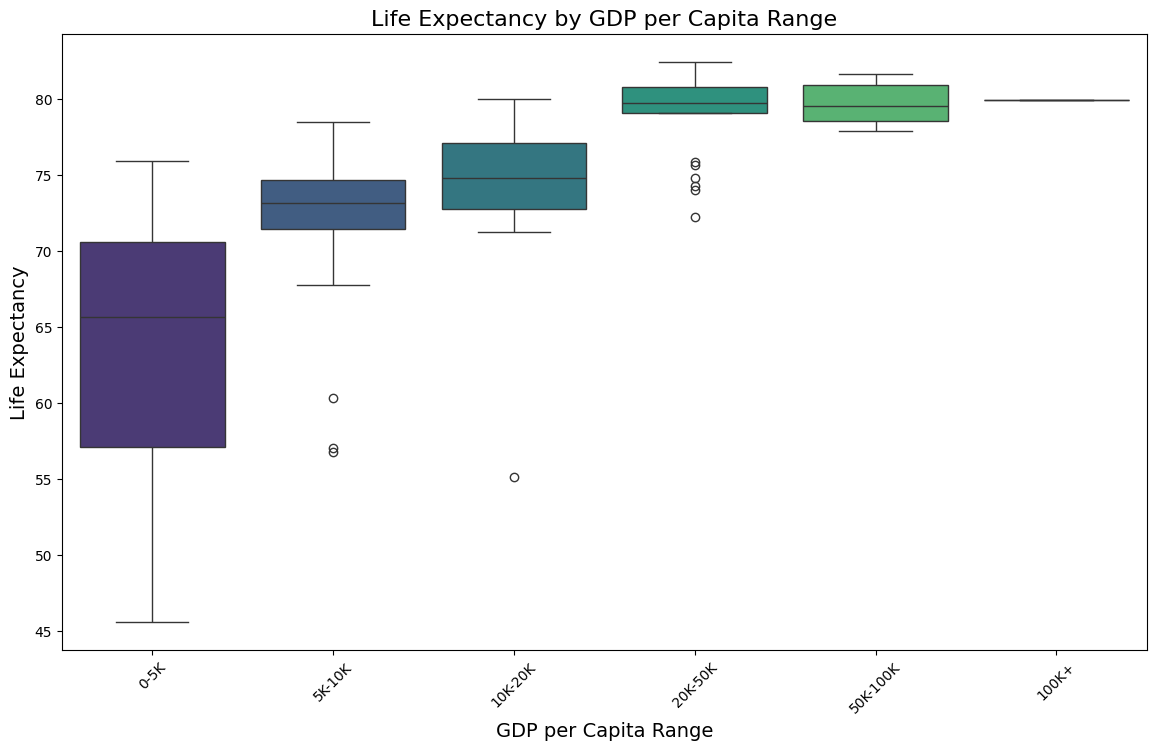

In [102]:
# GDP per capita를 구간별로 나누기
df['GDP_per_capita_range'] = pd.cut(df['GDP_per_capita'], bins=[0, 5000, 10000, 20000, 50000, 100000, float('inf')], labels=['0-5K', '5K-10K', '10K-20K', '20K-50K', '50K-100K', '100K+'])

plt.figure(figsize=(14, 8))
sns.boxplot(x='GDP_per_capita_range', y='Life_expectancy', data=df, palette='viridis')
plt.title('Life Expectancy by GDP per Capita Range', fontsize=16)
plt.xlabel('GDP per Capita Range', fontsize=14)
plt.ylabel('Life Expectancy', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [103]:
df.describe()

Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
count   179.0     179.000000         179.000000       179.000000   
mean   2007.5      30.363792          42.938268       192.251775   
std       0.0      26.725485          42.916952       111.659044   
min    2007.5       2.381250           3.000000        57.710313   
25%    2007.5       8.159375           9.775000       107.046906   
50%    2007.5      19.368750          23.137500       164.432406   
75%    2007.5      48.959375          68.321875       247.523922   
max    2007.5     115.718750         178.725000       572.974312   

       Alcohol_consumption  Hepatitis_B     Measles         BMI       Polio  \
count           179.000000   179.000000  179.000000  179.000000  179.000000   
mean              4.820882    84.292598   77.344972   25.032926   86.499651   
std               3.914554    13.820223   17.315208    2.165490   13.581153   
min               0.000025    30.687500   16.250000   20.212500   35.750000   
25%               1.317813    78.218750   64.000000   23.225000   80.531250   
50%               4.209375    88.000000   83.000000   25.650000   92.375000   
75%               7.843438    94.375000   92.250000   26.425000   96.062500   
max              15.100000    98.875000   99.000000   31.687500   98.937500   

       Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
count  179.000000     179.000000      179.000000      179.000000   
mean    86.271648       0.894288    11540.924930       36.675915   
std     13.931532       2.311895    16893.054182      136.655286   
min     31.312500       0.010000      263.937500        0.085000   
25%     80.812500       0.080000     1409.906250        2.108125   
50%     92.062500       0.164375     4402.625000        7.660625   
75%     95.781250       0.516250    12037.781250       22.745313   
max     99.000000      18.164375   102972.687500     1321.239375   

       Thinness_ten_nineteen_years  Thinness_five_nine_years   Schooling  \
count                   179.000000                179.000000  179.000000   
mean                      4.865852                  4.899825    7.632123   
std                       4.111094                  4.195663    3.126912   
min                       0.100000                  0.100000    1.337500   
25%                       1.756250                  1.731250    4.946875   
50%                       3.556250                  3.718750    7.831250   
75%                       7.165625                  7.056250   10.365625   
max                      27.100000                 27.943750   13.268750   

       Economy_status  Life_expectancy  GDP_per_capita_Z  Population_mln_Z  
count      179.000000       179.000000        179.000000      1.790000e+02  
mean         0.793296        68.856075          0.000000     -2.325886e-18  
std          0.406077         9.197699          0.977270      9.772698e-01  
min          0.000000        45.606250         -1.445838     -8.973039e-01  
25%          1.000000        62.303125         -0.597706     -5.389530e-01  
50%          1.000000        71.506250         -0.401774     -3.434154e-01  
75%          1.000000        74.937500          0.264467      9.185765e-02  
max          1.000000        82.456250          3.617869      4.920200e+00

In [104]:
df['GDP_quantile'] = pd.qcut(df['GDP_per_capita'], q=5, labels=False)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Log_GDP', y='Log_Life_expectancy', data=df, hue='GDP_quantile', palette='viridis', s=100, alpha=0.6)

# 회귀선 추가 (로그-로그 관계의 직선)
sns.regplot(x='Log_GDP', y='Log_Life_expectancy', data=df, scatter=False, line_kws={"color": "gray"})

plt.title('Log-Log Relationship with GDP Quantiles', fontsize=16)
plt.xlabel('Log of GDP per Capita', fontsize=14)
plt.ylabel('Log of Life Expectancy', fontsize=14)
plt.legend(title="GDP Quantiles")
plt.grid(True)
plt.show()

ValueError: Could not interpret value `Log_GDP` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x800 with 0 Axes>

### 4. 최종 인사이트

##### 4-1 국가별 기대수명

In [105]:
world = gpd.read_file("./ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
name_changes = {
    'United Republic of Tanzania': 'Tanzania',
    'Western Sahara': 'Sahrawi Arab Democratic Republic',
    'United States of America': 'United States',
    'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
    'Sudan': 'Sudan',
    'Russia': 'Russian Federation',
    'The Bahamas': 'Bahamas, The',
    'Falkland Islands': 'Falkland Islands (Malvinas)',
    'Greenland': 'Greenland',
    'French Southern and Antarctic Lands': 'French Southern and Antarctic Lands',
    'East Timor': 'Timor-Leste',
    'Venezuela': 'Venezuela, RB',
    'Puerto Rico': 'Puerto Rico',
    'Ivory Coast': "Cote d'Ivoire",
    'Republic of the Congo': 'Congo, Rep.',
    'eSwatini': 'Eswatini',
    'Palestine': 'Palestine',
    'Gambia': 'Gambia, The',
    'Laos': 'Lao PDR',
    'North Korea': 'Korea, Dem. People\'s Rep.',
    'South Korea': 'Korea, Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Iran': 'Iran, Islamic Rep.',
    'Syria': 'Syrian Arab Republic',
    'Turkey': 'Turkiye',
    'New Caledonia': 'New Caledonia',
    'Taiwan': 'Taiwan (Province of China)',
    'Brunei': 'Brunei Darussalam',
    'Slovakia': 'Slovak Republic',
    'Yemen': 'Yemen, Rep.',
    'Antarctica': 'Antarctica',
    'Northern Cyprus': 'Northern Cyprus',
    'Egypt': 'Egypt, Arab Rep.',
    'Somaliland': 'Somaliland',
    'Republic of Serbia': 'Serbia',
    'Kosovo': 'Kosovo',
    'South Sudan': 'South Sudan'
}

# ADMIN 열의 값을 변경
world['ADMIN'] = world['ADMIN'].replace(name_changes)
merged = world.merge(df, left_on="ADMIN", right_on="Country", how="left")


DataSourceError: ./ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp: No such file or directory

In [150]:

m = folium.Map(location=[30, 0], zoom_start=0.5, tiles="CartoDB positron")

# 기대수명을 Choropleth로 추가
folium.Choropleth(
    geo_data=merged.__geo_interface__,  # GeoJSON 포맷 사용
    data=merged,                      # 데이터프레임
    columns=['ADMIN', 'Life_expectancy'],  # 국가와 기대수명 컬럼
    key_on='feature.properties.ADMIN',  # 'ADMIN' 속성으로 연결
    fill_color='viridis',  # 색상 그라데이션
    fill_opacity=0.8,
    line_opacity=0.4,
    legend_name='Life Expectancy (Years)'
).add_to(m)

m

* 나라 별로 기대수명을 시각화 해본 결과

대륙 - 지역 별로 비슷한 기대수명을 공유하는 경향이 보였다.

##### 4-2 지역(대륙)별 기대수명

* 지역(대륙별) 기대수명 분포를 확인하기 위해 커널 밀도 추정으로 확인해보았다.

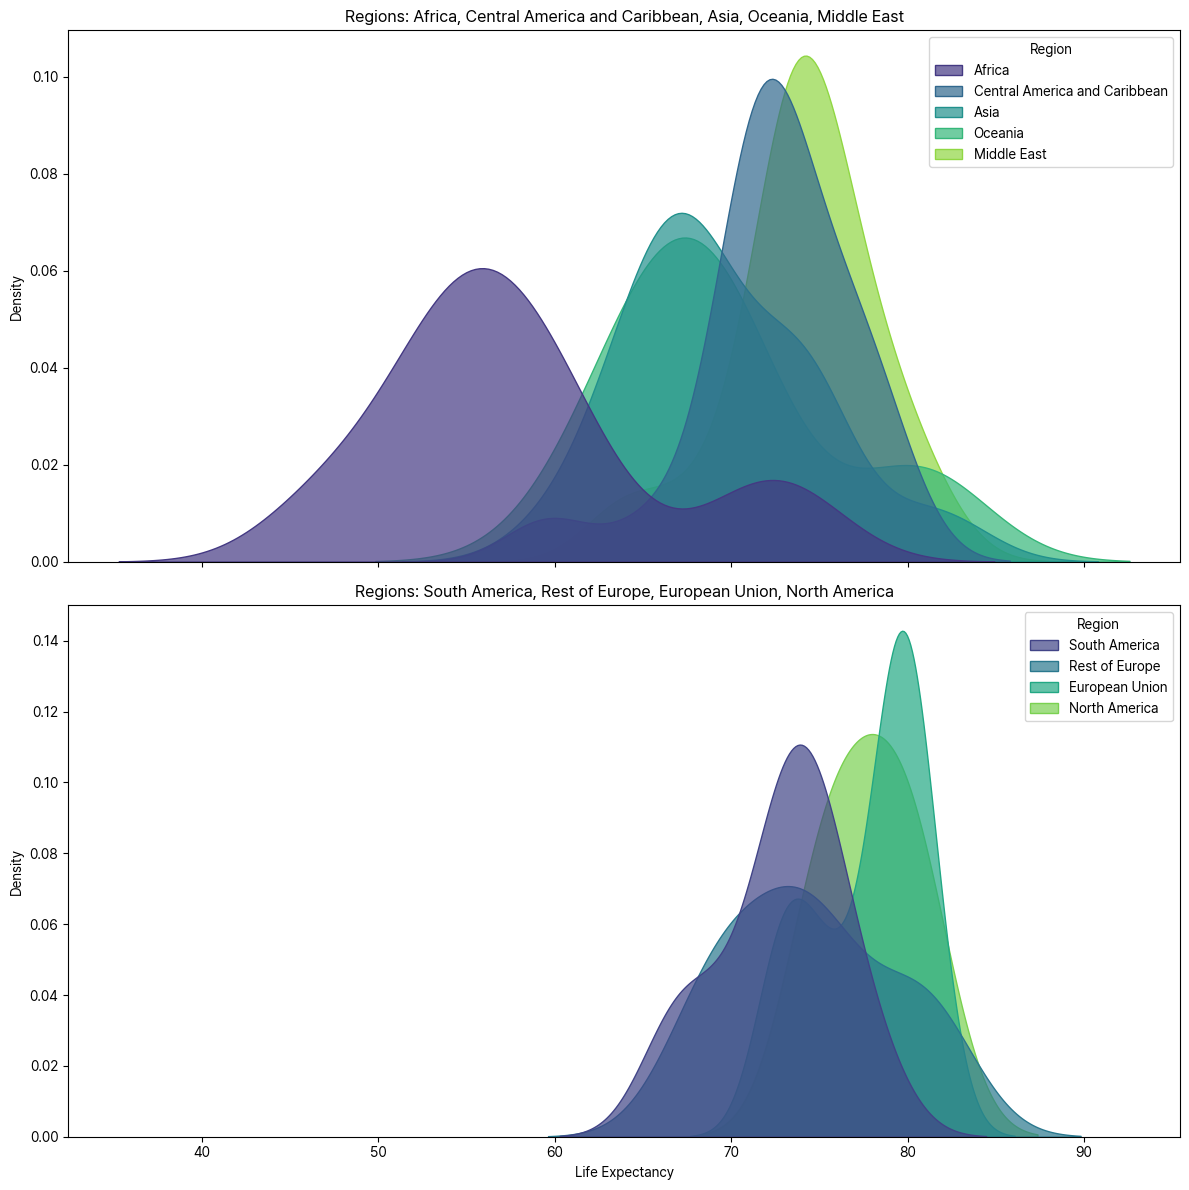

In [151]:
regions = df["Region"].unique()
n_regions = len(regions)


regions_per_subplot = 5
n_rows = int(np.ceil(n_regions / regions_per_subplot))


fig, axes = plt.subplots(n_rows, 1, figsize=(12, 6 * n_rows), sharex=True)


for i, ax in enumerate(axes):
    start_idx = i * regions_per_subplot
    end_idx = start_idx + regions_per_subplot
    selected_regions = regions[start_idx:end_idx]


    subset = df[df["Region"].isin(selected_regions)]
    
    sns.kdeplot(
        data=subset,
        x="Life_expectancy",
        hue="Region",
        fill=True,
        palette="viridis",
        alpha=0.7,
        common_norm=False,
        ax=ax,
    )
    
    ax.set_title(f"Regions: {', '.join(selected_regions)}", fontsize=12)
    ax.set_xlabel("Life Expectancy", fontsize=10)
    ax.set_ylabel("Density", fontsize=10)

plt.tight_layout()
plt.show()

 * **아프리카(Africa)** 지역은 가장 낮은 기대수명을 보이며, 국가 간 편차가 큰 편이다.
 * **오세아니아(Oceania)**, **유럽(Rest of Europe)**, 북아메리카(North America)는 높은 기대수명을 공유하며, 분포가 좁고 국가 간 편차가 작다.
 * **중남미 및 아시아 지역**은 중간 수준의 기대수명을 보이지만, 일부 국가는 더 높은 기대수명을 가지며 분포가 넓게 퍼져 있다.

##### 4-3 GDP, 인구수별 기대수명

 * GDP와 인구수는 boxplot과 로그 변환된 산점도, 회귀선을 통해 분석하였다.
    * ~~로그 변환을 사용한 이유는 gdp의 경우 로그 곡선형태의 산점도를 가지고 있어 비선형 관계를 더 명확하게 드러내고, 선형 패턴을 통해 직관적으로 해석하기 위해 사용~~
    * ~~인구수의 경우 대부분 낮은 인구수에 밀집하고 소수의 값이 높은 인구수에 분포하고 있어 로그 변환을 통해 데이터를 정규화해 데이터 분포를 개선하여 선형 관계를 파악하기 위해 로그 변환을 사용~~

**축약하면 선형관계를 더 직관적으로 파악하여 해석하기 위해 로그 변환 사용**

C:\Users\Playdata\AppData\Local\Temp\ipykernel_16608\3573831398.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Playdata\AppData\Local\Temp\ipykernel_16608\3573831398.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


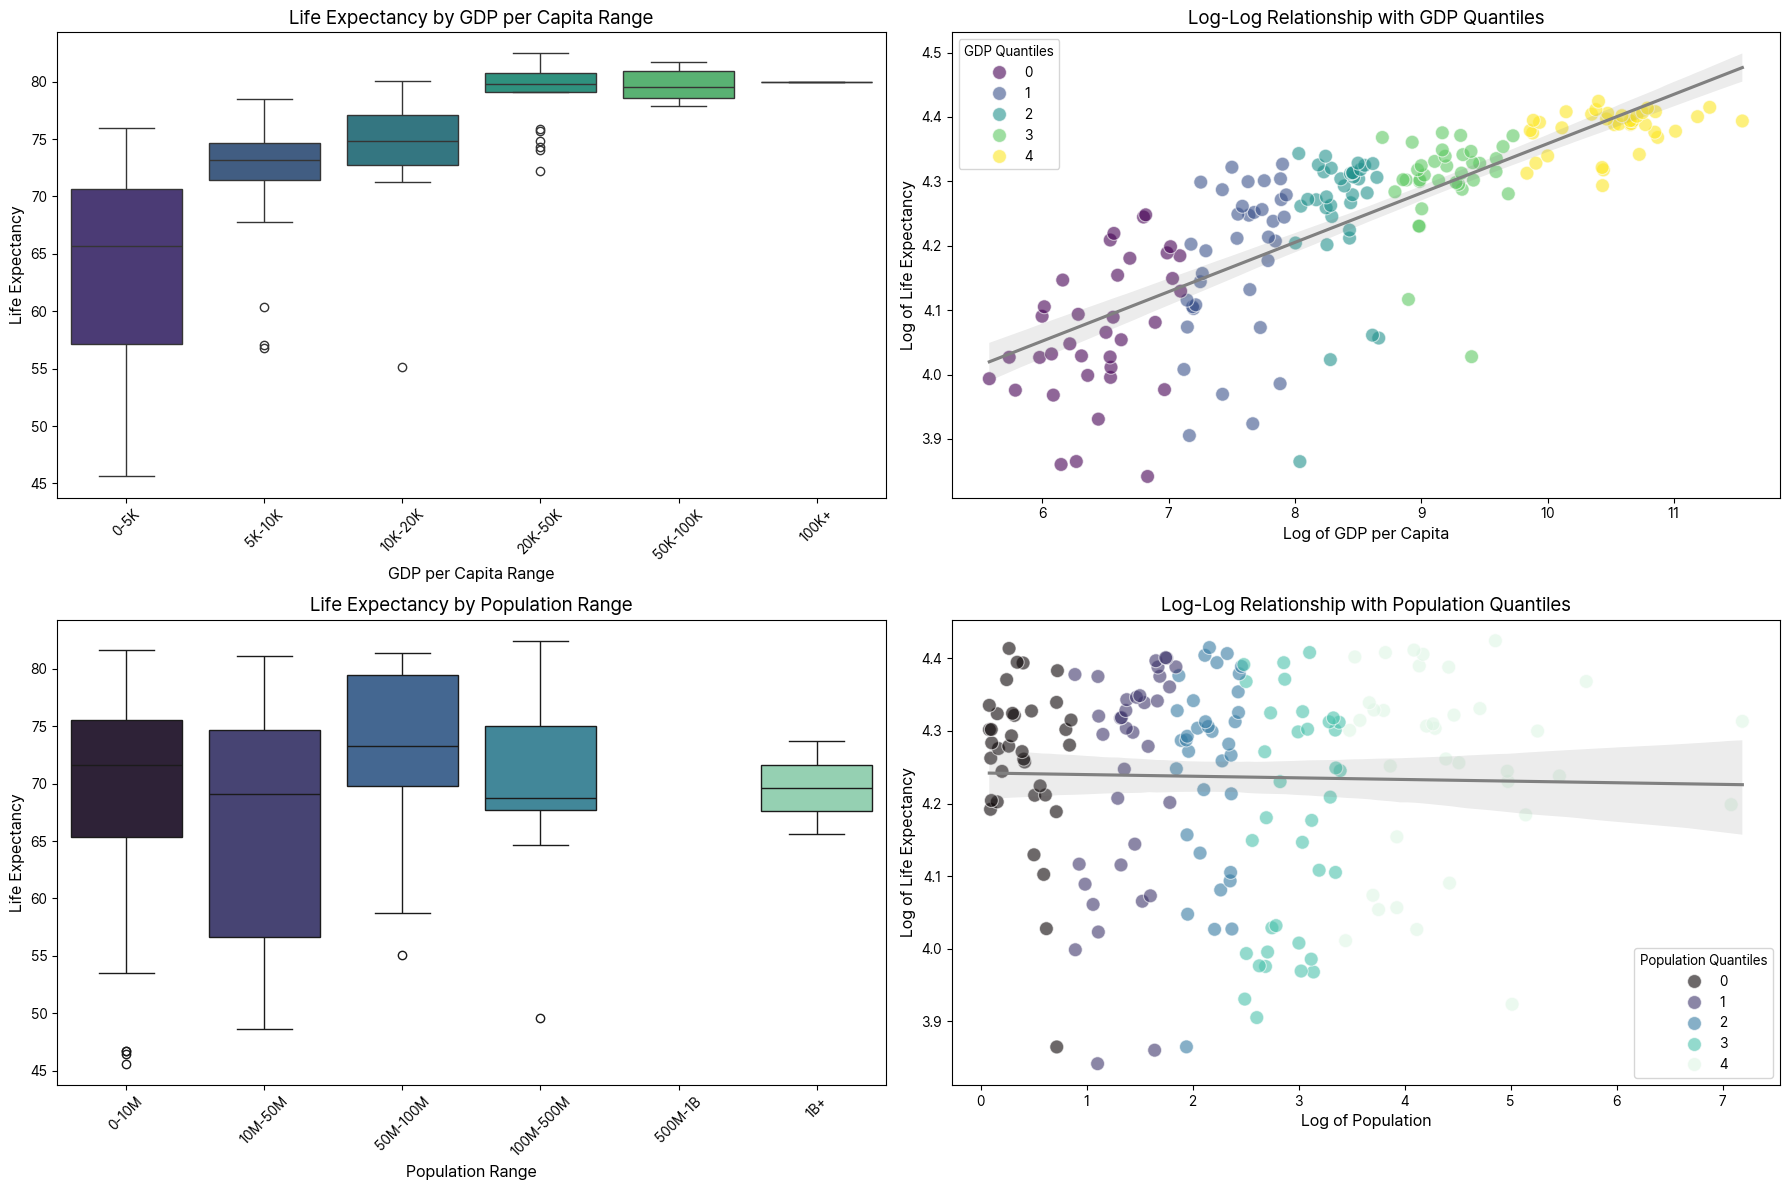

In [142]:

# GDP per Capita Range 구간별로 나누기
df['GDP_per_capita_range'] = pd.cut(df['GDP_per_capita'], bins=[0, 5000, 10000, 20000, 50000, 100000, float('inf')], labels=['0-5K', '5K-10K', '10K-20K', '20K-50K', '50K-100K', '100K+'])

# GDP per Capita 분위수 계산
df['GDP_quantile'] = pd.qcut(df['GDP_per_capita'], q=5, labels=False)

# Population_mln 구간별로 나누기
df['Population_range'] = pd.cut(df['Population_mln'], bins=[0, 10, 50, 100, 500, 1000, float('inf')], labels=['0-10M', '10M-50M', '50M-100M', '100M-500M', '500M-1B', '1B+'])

# Population 분위수 계산
df['Population_quantile'] = pd.qcut(df['Population_mln'], q=5, labels=False)

# Logarithmic transformation
# GDP 로그 변환
df['Log_GDP'] = np.log1p(df['GDP_per_capita'])
# Population 로그 변환
df['Log_Population'] = np.log1p(df['Population_mln'])
# Life Expectancy 로그 변환
df['Log_Life_expectancy'] = np.log1p(df['Life_expectancy'])

# Figure 설정
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Life Expectancy by GDP per Capita Range
sns.boxplot(
    x='GDP_per_capita_range', 
    y='Life_expectancy', 
    data=df, 
    palette='viridis', 
    ax=axes[0, 0]
)
axes[0, 0].set_title('Life Expectancy by GDP per Capita Range', fontsize=14)
axes[0, 0].set_xlabel('GDP per Capita Range', fontsize=12)
axes[0, 0].set_ylabel('Life Expectancy', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Log-Log Relationship with GDP Quantiles
sns.scatterplot(
    x='Log_GDP', 
    y='Log_Life_expectancy', 
    data=df, 
    hue='GDP_quantile', 
    palette='viridis', 
    s=100, 
    alpha=0.6, 
    ax=axes[0, 1]
)
sns.regplot(
    x='Log_GDP', 
    y='Log_Life_expectancy', 
    data=df, 
    scatter=False, 
    line_kws={"color": "gray"}, 
    ax=axes[0, 1]
)
axes[0, 1].set_title('Log-Log Relationship with GDP Quantiles', fontsize=14)
axes[0, 1].set_xlabel('Log of GDP per Capita', fontsize=12)
axes[0, 1].set_ylabel('Log of Life Expectancy', fontsize=12)
axes[0, 1].legend(title="GDP Quantiles")

# 3. Life Expectancy by Population Range
sns.boxplot(
    x='Population_range', 
    y='Life_expectancy', 
    data=df, 
    palette='mako', 
    ax=axes[1, 0]
)
axes[1, 0].set_title('Life Expectancy by Population Range', fontsize=14)
axes[1, 0].set_xlabel('Population Range', fontsize=12)
axes[1, 0].set_ylabel('Life Expectancy', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Log-Log Relationship with Population Quantiles
sns.scatterplot(
    x='Log_Population', 
    y='Log_Life_expectancy', 
    data=df, 
    hue='Population_quantile', 
    palette='mako', 
    s=100, 
    alpha=0.6, 
    ax=axes[1, 1]
)
sns.regplot(
    x='Log_Population', 
    y='Log_Life_expectancy', 
    data=df, 
    scatter=False, 
    line_kws={"color": "gray"}, 
    ax=axes[1, 1]
)
axes[1, 1].set_title('Log-Log Relationship with Population Quantiles', fontsize=14)
axes[1, 1].set_xlabel('Log of Population', fontsize=12)
axes[1, 1].set_ylabel('Log of Life Expectancy', fontsize=12)
axes[1, 1].legend(title="Population Quantiles")

# Layout 조정
plt.tight_layout()
plt.show()

* GDP에 따른 기대수명 변화
    * GDP가 낮은 구간에서는 기대수명이 상대적으로 낮고 변동폭도 크다.
    * GDP가 증가할수록 기대수명이 뚜렷하게 상승하며, 변동폭이 감소한다.특히 20K 이상 구간에서는 기대수명이 75세 이상으로 안정화되며, GDP가 더 증가해도 큰 변화는 없다.
    * 회귀선을 기준으로 데이터가 고르게 분포하여 상관관계가 뚜렷함을 알 수 있다.

* 인구수에 따른 기대수명 변화
    * 인구가 적은 나라는 기대수의 분포가 넓고 국가 간 편차가 크다. 반대로 인구가 많은 나라는 기대수명이 상대적으로 좁은 범위에 걸쳐져 있다.
    * 로그 변환된 인구와 기대수명 간에 회귀선의 기울기가 수평에 가까워 뚜렷한 상관관계는 발견되지 않았다.


    해석

    * 초기 단계에서는 GDP 상승이 기대수명을 크게 증가시키는 요인으로 작용한다.
    * 그러나 일정 수준(GDP 20K 이상) 이상에서는 기대수명이 포화 상태에 가까워지는 경향이 있다.
    * 인구수는 기대수명에 뚜렷한 영향을 주는 요인은 아니며, 관계가 약한 것으로 보입니다.
    * 다만 인구가 많은 나라일수록 기대수명이 비교적 안정적인 범위에 분포하는 경향이 있습니다.
